In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 讀 csv 檔
df = pd.read_csv("train.csv")

In [3]:
# 轉 Age、Sex、Survived 為 numpy array
Age = df["Age"].to_numpy()
Age.shape = (891,)
Sex = df["Sex"].to_numpy()
Sex.shape = (891,)
Survived = df["Survived"].to_numpy()
Survived.shape = (891,)

In [4]:
# Age 的 NaN 轉為 0
for i in range(len(Age)):
    if np.isnan(Age[i]):
        Age[i] = 0 

In [5]:
# Sex 的 Male 轉為 0、Female 轉為 1
for i in range(len(Sex)):
    if Sex[i] == 'male':
        Sex[i] = 0
    else:
        Sex[i] = 1

In [6]:
# 合併 Sex、Age
Sex = np.reshape(Sex, (891, 1))
Age = np.reshape(Age, (891, 1))
arr = np.append(Sex, Age, axis = 1)

In [7]:
# 使用 SVM 訓練
from sklearn.svm import SVC

In [8]:
clf = SVC()

In [9]:
clf.fit(arr, Survived)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
y_predict = clf.predict(arr)

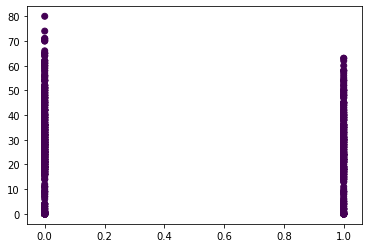

In [11]:
plt.scatter(arr[:, 0], arr[:, 1], c = y_predict)

In [12]:
# 引入套件找出正確率
from sklearn.metrics import accuracy_score
accuracy_score(Survived, y_predict)

0.6161616161616161